# 회귀분석

### 구할 항목 1 : 신뢰도 (평균평점 * 담긴수 * 긍정확률 평균) = x1
### 구할 항목 2 : 반품비율 ( 반품수 / 주문수 ) = x2

#### 이 두가지 항목을 연결지어 하나의 회귀로 돌림 - 관계를 나타내는 그래프 2개가 나와야함 그다음 회귀분석을 돌려 summary로 p값 확인

In [1]:
!pip install statsmodels

In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings(action='ignore')

In [23]:
Regression=pd.read_csv('주문수 환불액 매출액.csv')
Regression.columns

Index(['주문상품명', '주문수', '환불수', '매출액'], dtype='object')

In [24]:
Regression.dtypes

주문상품명    object
주문수       int64
환불수       int64
매출액       int64
dtype: object

In [25]:
Regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2036 entries, 0 to 2035
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   주문상품명   2036 non-null   object
 1   주문수     2036 non-null   int64 
 2   환불수     2036 non-null   int64 
 3   매출액     2036 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 63.8+ KB


In [26]:
Regre=Regression.dropna(axis=0)
Regre.dtypes

주문상품명    object
주문수       int64
환불수       int64
매출액       int64
dtype: object

In [27]:
Regre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2036 entries, 0 to 2035
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   주문상품명   2036 non-null   object
 1   주문수     2036 non-null   int64 
 2   환불수     2036 non-null   int64 
 3   매출액     2036 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 79.5+ KB


In [29]:
cnt=pd.read_csv('반품수량다시가져옴.csv')
cnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   주문상품명   57 non-null     object
 1   반품수량    57 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ KB


In [30]:
stat=pd.read_csv('통계서비스_장바구니분석_담긴상품_20210818.csv')
stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   상품명      21 non-null     object 
 1   담긴수      21 non-null     int64  
 2   노출수      21 non-null     int64  
 3   담긴수:노출수  21 non-null     object 
 4   담김율      21 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 968.0+ bytes


In [33]:
#담김율 : (담긴수 / 노출수) * 100
stat=stat.drop(['담긴수:노출수'],axis=1)
stat.head()

,상품명,담긴수,노출수,담김율
0,[La belle rose]레이니 찰랑 미니 훌원피스,944,38664,2.44
1,[La belle rose]페이어 유넥티,825,9366,8.81
2,[La belle rose]바넷 브이 끈 롱원피스,481,8296,5.80
3,프리미 여리핏 가디건,472,12361,3.82
4,[La belle rose]로제 스퀘어 미니훌원피스,430,38078,1.13


In [38]:
stat.rename(columns={'상품명':'주문상품명'},inplace=True)
stat.head()

,주문상품명,담긴수,노출수,담김율
0,[La belle rose]레이니 찰랑 미니 훌원피스,944,38664,2.44
1,[La belle rose]페이어 유넥티,825,9366,8.81
2,[La belle rose]바넷 브이 끈 롱원피스,481,8296,5.80
3,프리미 여리핏 가디건,472,12361,3.82
4,[La belle rose]로제 스퀘어 미니훌원피스,430,38078,1.13


In [39]:
cnt.head()

,주문상품명,반품수량
0,[1+1] 기획특가♥웰데이 베이직셔츠(썸머.ver),1
1,[DAYONE LABEL]빈티지 중청 숏데님,1
2,[DAYONE LABEL]슬림 세미부츠컷 데님팬츠,1
3,[DAYONE LABEL]아이시블루 썸머 하이스키니진,1
4,[DAYONE LABEL]쫀쫀 연청 숏데님,2


In [42]:
#Regre, stat, cnt를 Regre의 주문상품명을 기준으로 합치기
result=pd.merge(Regre,stat,how='outer',on='주문상품명')
result

,주문상품명,주문수,환불수,매출액,담긴수,노출수,담김율
0,[La belle rose]레이니 찰랑 미니 훌원피스,212.0,34.0,5304400.0,944.0,38664.0,2.44
1,[La belle rose]레이니 찰랑 미니 훌원피스,122.0,16.0,3158800.0,944.0,38664.0,2.44
2,[La belle rose]페이어 유넥티,139.0,20.0,1404200.0,825.0,9366.0,8.81
3,[La belle rose]페이어 유넥티,80.0,12.0,802400.0,825.0,9366.0,8.81
4,[La belle rose]페이어 유넥티,64.0,14.0,590000.0,825.0,9366.0,8.81
...,...,...,...,...,...,...,...
2032,루세 시스루 셔링블라우스,0.0,1.0,-32500.0,NaN,NaN,NaN
2033,코노 셔츠원피스(벨트set),0.0,1.0,-23000.0,NaN,NaN,NaN
2034,세이린 롱원피스(벨트set),1.0,2.0,-48900.0,NaN,NaN,NaN
2035,보브 프릴블라우스,0.0,3.0,-123000.0,NaN,NaN,NaN


In [44]:
result.to_excel('result1.xlsx',index=False)

In [49]:
Regres=pd.merge(result,cnt,how='outer',on='주문상품명')
Regres

,주문상품명,주문수,환불수,매출액,담긴수,노출수,담김율,반품수량
0,[La belle rose]레이니 찰랑 미니 훌원피스,212.0,34.0,5304400.0,944.0,38664.0,2.44,3.0
1,[La belle rose]레이니 찰랑 미니 훌원피스,122.0,16.0,3158800.0,944.0,38664.0,2.44,3.0
2,[La belle rose]페이어 유넥티,139.0,20.0,1404200.0,825.0,9366.0,8.81,3.0
3,[La belle rose]페이어 유넥티,80.0,12.0,802400.0,825.0,9366.0,8.81,3.0
4,[La belle rose]페이어 유넥티,64.0,14.0,590000.0,825.0,9366.0,8.81,3.0
...,...,...,...,...,...,...,...,...
2033,코노 셔츠원피스(벨트set),0.0,1.0,-23000.0,NaN,NaN,NaN,NaN
2034,세이린 롱원피스(벨트set),1.0,2.0,-48900.0,NaN,NaN,NaN,NaN
2035,보브 프릴블라우스,0.0,3.0,-123000.0,NaN,NaN,NaN,NaN
2036,합계,NaN,NaN,NaN,27269.0,746105.0,3.65,NaN


In [50]:
Regres.shape

(2038, 8)

In [51]:
Regres.to_excel('Regres.xlsx',index=False)

In [54]:
Regres=Regres.dropna(axis=0)
Regres.shape

(35, 8)

In [55]:
Regres

,주문상품명,주문수,환불수,매출액,담긴수,노출수,담김율,반품수량
0,[La belle rose]레이니 찰랑 미니 훌원피스,212.0,34.0,5304400.0,944.0,38664.0,2.44,3.0
1,[La belle rose]레이니 찰랑 미니 훌원피스,122.0,16.0,3158800.0,944.0,38664.0,2.44,3.0
2,[La belle rose]페이어 유넥티,139.0,20.0,1404200.0,825.0,9366.0,8.81,3.0
3,[La belle rose]페이어 유넥티,80.0,12.0,802400.0,825.0,9366.0,8.81,3.0
4,[La belle rose]페이어 유넥티,64.0,14.0,590000.0,825.0,9366.0,8.81,3.0
5,[La belle rose]페이어 유넥티,40.0,7.0,389400.0,825.0,9366.0,8.81,3.0
6,[La belle rose]페이어 유넥티,28.0,3.0,295000.0,825.0,9366.0,8.81,3.0
7,[La belle rose]페이어 유넥티,4.0,2.0,23600.0,825.0,9366.0,8.81,3.0
12,드민 플라워 쉬폰롱원피스,119.0,29.0,4302000.0,375.0,29077.0,1.29,3.0
13,드민 플라워 쉬폰롱원피스,2.0,0.0,95600.0,375.0,29077.0,1.29,3.0


In [57]:
Regres.columns

Index(['주문상품명', '주문수', '환불수', '매출액', '담긴수', '노출수', '담김율', '반품수량'], dtype='object')

### 구할 항목 1 : 신뢰도 (평균평점 * 담긴수 * 긍정확률 평균) = x1
### 구할 항목 2 : 반품비율 ( 반품수 / 주문수 ) = x2

### X2 시행

In [59]:
Regres['반품비율']=Regres['반품수량']/Regres['주문수']
Regres.head()

,주문상품명,주문수,환불수,매출액,담긴수,노출수,담김율,반품수량,반품비율
0,[La belle rose]레이니 찰랑 미니 훌원피스,212.0,34.0,5304400.0,944.0,38664.0,2.44,3.0,0.014151
1,[La belle rose]레이니 찰랑 미니 훌원피스,122.0,16.0,3158800.0,944.0,38664.0,2.44,3.0,0.024590
2,[La belle rose]페이어 유넥티,139.0,20.0,1404200.0,825.0,9366.0,8.81,3.0,0.021583
3,[La belle rose]페이어 유넥티,80.0,12.0,802400.0,825.0,9366.0,8.81,3.0,0.037500
4,[La belle rose]페이어 유넥티,64.0,14.0,590000.0,825.0,9366.0,8.81,3.0,0.046875


In [63]:
import seaborn as sns
from matplotlib import font_manager,rc
font_path='C:\Windows\Fonts/malgun.ttf'
font=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)

<AxesSubplot:xlabel='매출액', ylabel='반품비율'>

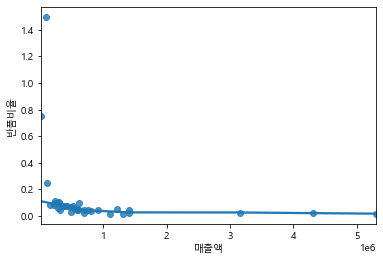

In [64]:
sns.regplot(Regres['매출액'],Regres['반품비율'],lowess=True)

### X1 수행

In [66]:
Regres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 118
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   주문상품명   35 non-null     object 
 1   주문수     35 non-null     float64
 2   환불수     35 non-null     float64
 3   매출액     35 non-null     float64
 4   담긴수     35 non-null     float64
 5   노출수     35 non-null     float64
 6   담김율     35 non-null     float64
 7   반품수량    35 non-null     float64
 8   반품비율    35 non-null     float64
dtypes: float64(8), object(1)
memory usage: 2.7+ KB


In [67]:
Regres.to_excel('X2그래프.xlsx',index=False)

In [68]:
rg=pd.read_excel('X2반영.xlsx')
rg.head()

,주문상품명,주문수,환불수,매출액,담긴수,노출수,담김율,반품수량,반품비율,평균평점,긍정확률 평균
0,[La belle rose]레이니 찰랑 미니 훌원피스,212,34,5304400,944,38664,2.44,3,0.014151,4.818182,0.935579
1,[La belle rose]레이니 찰랑 미니 훌원피스,122,16,3158800,944,38664,2.44,3,0.024590,4.818182,0.935579
2,[La belle rose]페이어 유넥티,139,20,1404200,825,9366,8.81,3,0.021583,4.637306,0.826701
3,[La belle rose]페이어 유넥티,80,12,802400,825,9366,8.81,3,0.037500,4.637306,0.826701
4,[La belle rose]페이어 유넥티,64,14,590000,825,9366,8.81,3,0.046875,4.637306,0.826701


In [69]:
rg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   주문상품명    35 non-null     object 
 1   주문수      35 non-null     int64  
 2   환불수      35 non-null     int64  
 3   매출액      35 non-null     int64  
 4   담긴수      35 non-null     int64  
 5   노출수      35 non-null     int64  
 6   담김율      35 non-null     float64
 7   반품수량     35 non-null     int64  
 8   반품비율     35 non-null     float64
 9   평균평점     35 non-null     float64
 10  긍정확률 평균  35 non-null     float64
dtypes: float64(4), int64(6), object(1)
memory usage: 3.1+ KB


In [70]:
#신뢰도 (평균평점 * 담긴수 * 긍정확률 평균) = x1
rg['신뢰도']=rg['평균평점']*rg['담긴수']*rg['긍정확률 평균']
rg.head()

,주문상품명,주문수,환불수,매출액,담긴수,노출수,담김율,반품수량,반품비율,평균평점,긍정확률 평균,신뢰도
0,[La belle rose]레이니 찰랑 미니 훌원피스,212,34,5304400,944,38664,2.44,3,0.014151,4.818182,0.935579,4255.354965
1,[La belle rose]레이니 찰랑 미니 훌원피스,122,16,3158800,944,38664,2.44,3,0.024590,4.818182,0.935579,4255.354965
2,[La belle rose]페이어 유넥티,139,20,1404200,825,9366,8.81,3,0.021583,4.637306,0.826701,3162.772001
3,[La belle rose]페이어 유넥티,80,12,802400,825,9366,8.81,3,0.037500,4.637306,0.826701,3162.772001
4,[La belle rose]페이어 유넥티,64,14,590000,825,9366,8.81,3,0.046875,4.637306,0.826701,3162.772001


<AxesSubplot:xlabel='매출액', ylabel='신뢰도'>

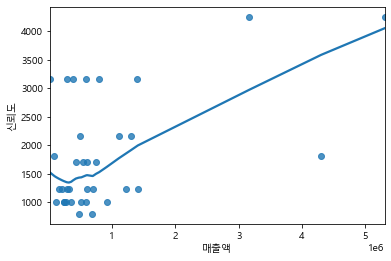

In [71]:
sns.regplot('매출액','신뢰도',lowess=True,data=rg)

In [72]:
x_data=rg[['신뢰도','반품비율']] #X1,X2
target=rg[['매출액']] #Y1

In [73]:
x_data1=sm.add_constant(x_data,has_constant='add')

In [74]:
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    매출액   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     7.335
Date:                Wed, 18 Aug 2021   Prob (F-statistic):            0.00239
Time:                        21:43:29   Log-Likelihood:                -530.65
No. Observations:                  35   AIC:                             1067.
Df Residuals:                      32   BIC:                             1072.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.511e+04   3.56e+05     -0.155      0.878    -7.8e+05     6.7e+05
신뢰도          587.4577    169.300      3.470      0.002     242.604     932.311
반품비율       -1.094e+06   6.19e+05     -1.769      0.086   -2.35e+06    1.66e+05
==============================================================================
Omnibus:                       26.945   Durbin-Watson:                   1.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           1.881   Prob(JB):                     2.95e-12
Kurtosis:                       7.718   Cond. No.                     7.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
x_data=rg[['신뢰도']] #X2
target=rg[['매출액']] #Y1

In [76]:
x_data2=sm.add_constant(x_data,has_constant='add')

In [77]:
multi_model = sm.OLS(target, x_data2)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    매출액   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     10.84
Date:                Wed, 18 Aug 2021   Prob (F-statistic):            0.00237
Time:                        21:58:20   Log-Likelihood:                -532.28
No. Observations:                  35   AIC:                             1069.
Df Residuals:                      33   BIC:                             1072.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.658e+05   3.61e+05     -0.459      0.649   -9.01e+05     5.7e+05
신뢰도          574.6571    174.513      3.293      0.002     219.607     929.708
==============================================================================
Omnibus:                       25.760   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.293
Skew:                           1.800   Prob(JB):                     1.98e-11
Kurtosis:                       7.566   Cond. No.                     4.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
x_data=rg[['반품비율']] #X2
target=rg[['매출액']] #Y1
x_data3=sm.add_constant(x_data,has_constant='add')
multi_model = sm.OLS(target, x_data3)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    매출액   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     1.971
Date:                Wed, 18 Aug 2021   Prob (F-statistic):              0.170
Time:                        21:59:07   Log-Likelihood:                -536.24
No. Observations:                  35   AIC:                             1076.
Df Residuals:                      33   BIC:                             1080.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.008e+06   2.09e+05      4.823      0.000    5.83e+05    1.43e+06
반품비율       -1.002e+06   7.14e+05     -1.404      0.170   -2.45e+06     4.5e+05
==============================================================================
Omnibus:                       39.601   Durbin-Watson:                   0.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.154
Skew:                           2.723   Prob(JB):                     2.68e-25
Kurtosis:                       9.924   Cond. No.                         3.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

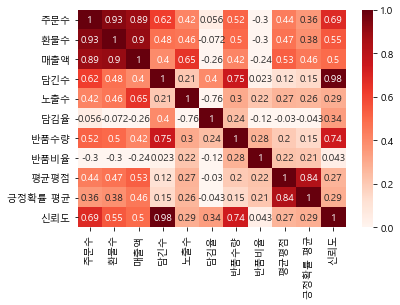

In [82]:
sns.heatmap(rg.corr(),annot=True,cmap='Reds',vmin=0,vmax=1)

In [83]:
rg.corr()

,주문수,환불수,매출액,담긴수,노출수,담김율,반품수량,반품비율,평균평점,긍정확률 평균,신뢰도
주문수,1.000000,0.932069,0.887578,0.620120,0.419387,0.056425,0.517305,-0.298402,0.440365,0.358413,0.686694
환불수,0.932069,1.000000,0.904251,0.480445,0.464768,-0.072083,0.502600,-0.301176,0.469137,0.381608,0.548887
매출액,0.887578,0.904251,1.000000,0.395164,0.653354,-0.264352,0.415636,-0.237385,0.530893,0.455504,0.497311
담긴수,0.620120,0.480445,0.395164,1.000000,0.209718,0.401140,0.753628,0.023283,0.119335,0.146403,0.984638
노출수,0.419387,0.464768,0.653354,0.209718,1.000000,-0.759632,0.303233,0.216142,0.270218,0.263047,0.290766
담김율,0.056425,-0.072083,-0.264352,0.401140,-0.759632,1.000000,0.244356,-0.116524,-0.029786,-0.042802,0.340065
반품수량,0.517305,0.502600,0.415636,0.753628,0.303233,0.244356,1.000000,0.278434,0.202931,0.151501,0.740748
반품비율,-0.298402,-0.301176,-0.237385,0.023283,0.216142,-0.116524,0.278434,1.000000,0.223325,0.214529,0.042751
평균평점,0.440365,0.469137,0.530893,0.119335,0.270218,-0.029786,0.202931,0.223325,1.000000,0.835661,0.270245
긍정확률 평균,0.358413,0.381608,0.455504,0.146403,0.263047,-0.042802,0.151501,0.214529,0.835661,1.000000,0.292492
